In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filename = "NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root"
tree = Tree(filename)
preselection = Selection(tree,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(tree,mask=sixb_in_preselection,include=preselection,tag="baseline")
tree.calc_jet_dr(baseline.jets_selected)
print(baseline)

--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
--- all baseline ---
Event Efficiency:   0.29
Selected Purity(6): 1.00
Passed Jet S/T:     0.79


# Six Jet Selection

In [3]:
first_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=60,btagcut=jet_btagWP[tightWP]),njets=1,include=baseline,tag="T60")
second_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[tightWP]),njets=1,previous=first_signaljet,include=baseline,tag="T40")
third_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[mediumWP]),njets=1,previous=second_signaljet,include=baseline,tag="M40")
fourth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[mediumWP]),njets=1,previous=third_signaljet,include=baseline,tag="M20")
fifth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fourth_signaljet,include=baseline,tag="L20")
sixth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fifth_signaljet,include=baseline,tag="L20")

sixjet_selection = sixth_signaljet.merge(tag="trial")
sixjet_ptordered = sixjet_selection.sorted_selected_jets("jet_pt")

# Investigating Remaining 

In [16]:
remaining = Selection(tree,previous=sixjet_selection,include=baseline,tag="remaining")

--- 6 trial | all remaining ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.19


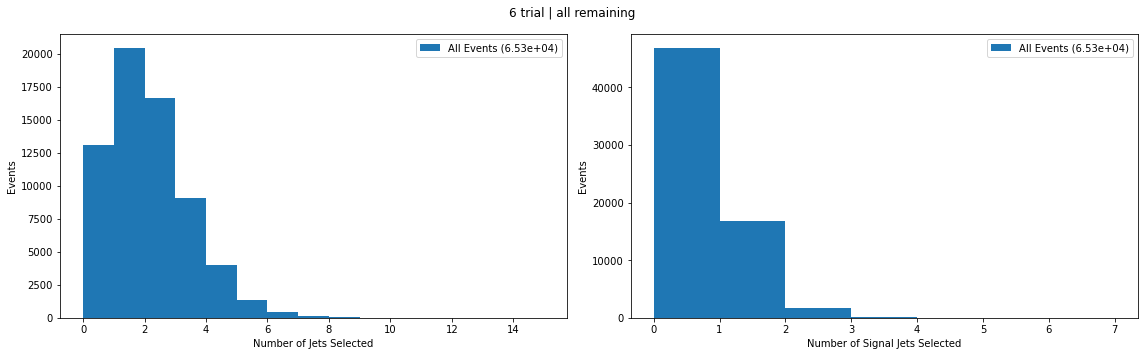

--- 6 trial | all remaining ---
Event Efficiency:   0.8
Selected Purity(6): 0.00
Passed Jet S/T:     0.19


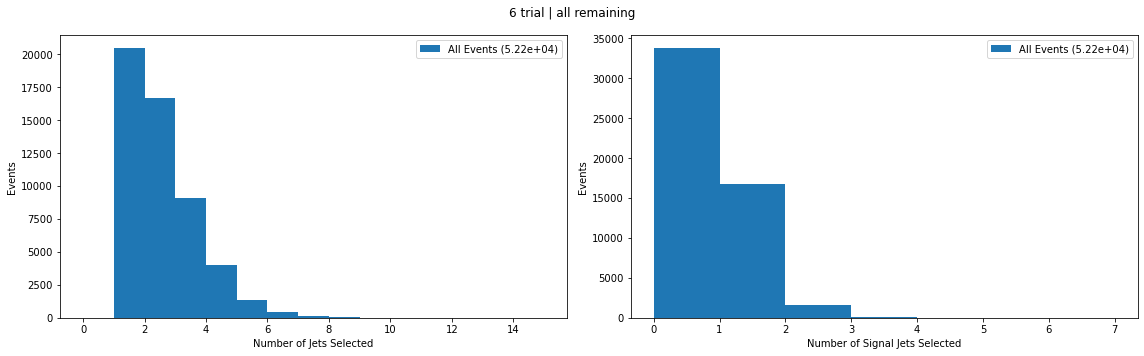

--- 6 trial | all remaining ---


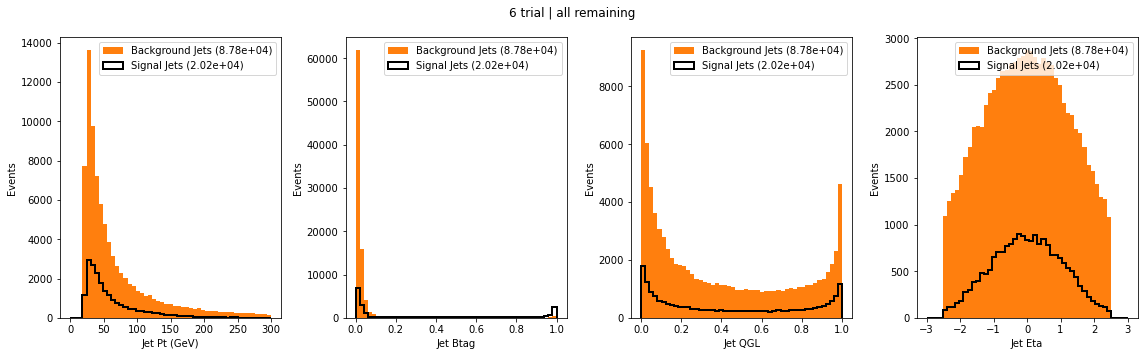

--- 6 trial | all remaining ---


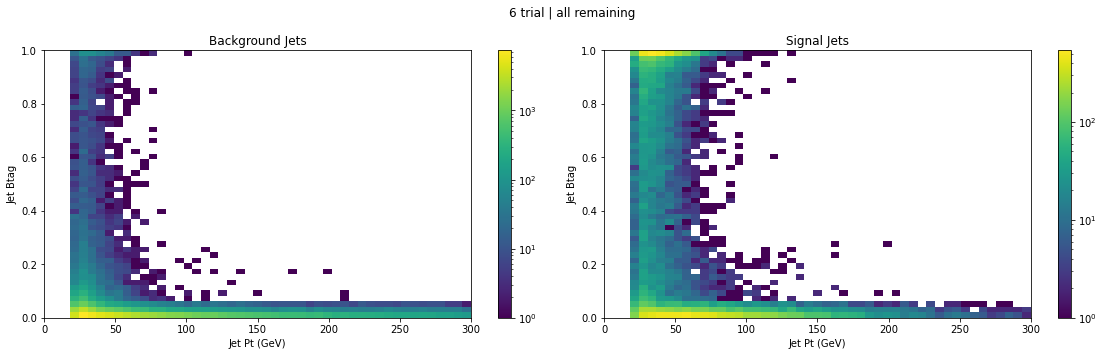

In [6]:
njet_study(remaining,saveas="trial_remaining")
njet_study(remaining,mask=remaining.njets_selected>0,saveas="trial_jets_remaining")
jets_study(remaining,print_score=0,saveas="trial_remaining")
jets_2d_study(remaining,log=1,print_score=0,saveas="trial_remaining")

In [7]:
remaining_Tbtag = Selection(tree,cuts=dict(btagcut=jet_btagWP[tightWP]),previous=sixjet_selection,include=baseline,tag="remaining Tbtag")
remaining_Mbtag = Selection(tree,cuts=dict(btagcut=jet_btagWP[mediumWP]),previous=remaining_Tbtag,include=baseline,tag="remaining Mbtag")
remaining_Lbtag = Selection(tree,cuts=dict(btagcut=jet_btagWP[looseWP]),previous=remaining_Mbtag,include=baseline,tag="remaining Lbtag")
remaining_Nbtag = Selection(tree,cuts=dict(btagcut=jet_btagWP[nullWP]),previous=remaining_Lbtag,include=baseline,tag="remaining Nbtag")

In [27]:
merged_remaining = remaining_Nbtag.merge("merged remaining")

In [18]:
merged_ptordered = remaining.merge("remaining ptordered")

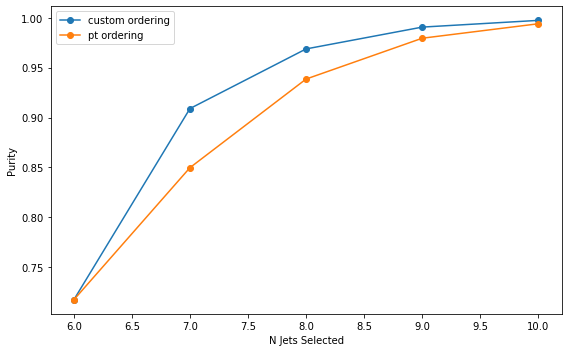

In [25]:
selection_comparison_study([merged_remaining,merged_ptordered],labels=["custom ordering","pt ordering"],saveas="order_comparison")

In [10]:
first_remaining = Selection(tree,njets=1,previous=sixjet_selection,include=merged_remaining,tag="reclaimed")
first_remaining.ignore_include_tag = True

--- 6 trial | 1 reclaimed ---
Event Efficiency:   1.0
Selected Purity(1): 0.21
Passed Jet S/T:     0.19


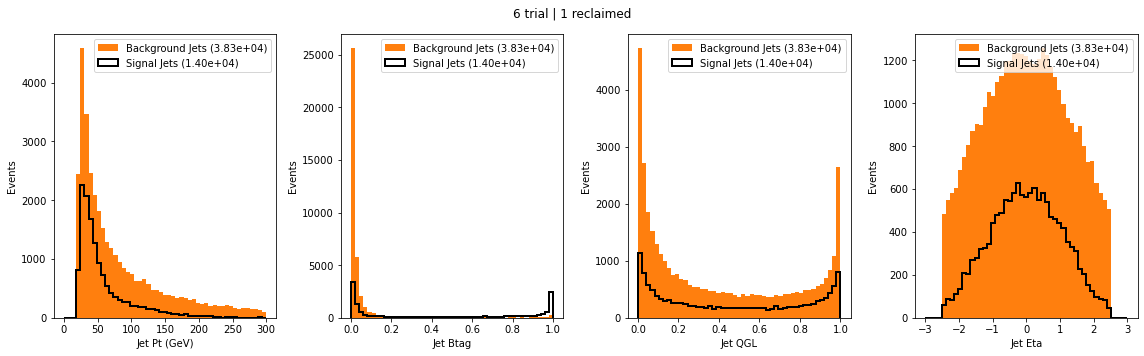

In [11]:
jets_study(first_remaining,saveas="seventh_signaljet")

--- 6 trial | 1 reclaimed ---
Event Efficiency:   1.0
Selected Purity(1): 0.21
Passed Jet S/T:     0.19


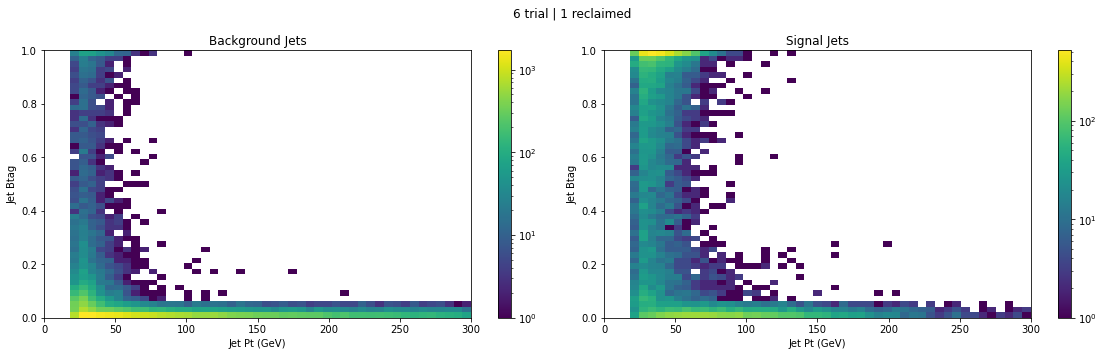

In [29]:
jets_2d_study(first_remaining,saveas="seventh_signaljet",log=1)

--- 6 trial | 1 remaining ---
Event Efficiency:   1.0
Selected Purity(1): 0.15
Passed Jet S/T:     0.19


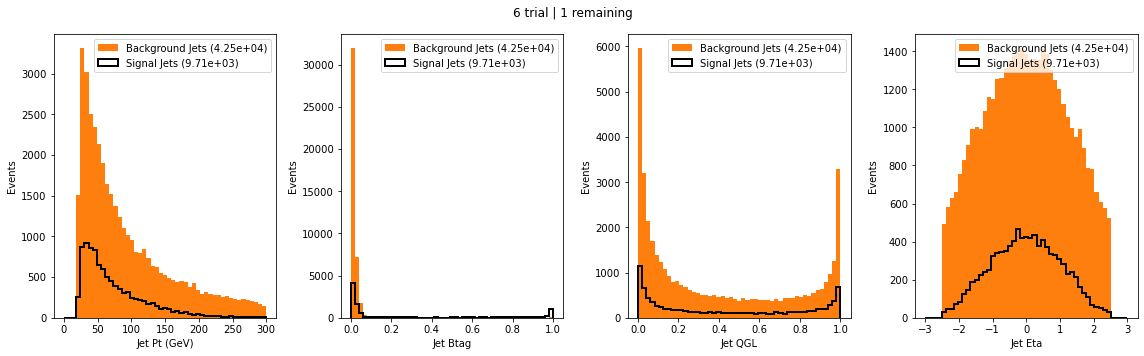

In [17]:
jets_study(remaining.selected_njets(1),saveas="remaining_highestpt")

--- 7 merged remaining ---
Event Efficiency:   0.63
Selected Purity(6): 0.91
Passed Jet S/T:     0.78


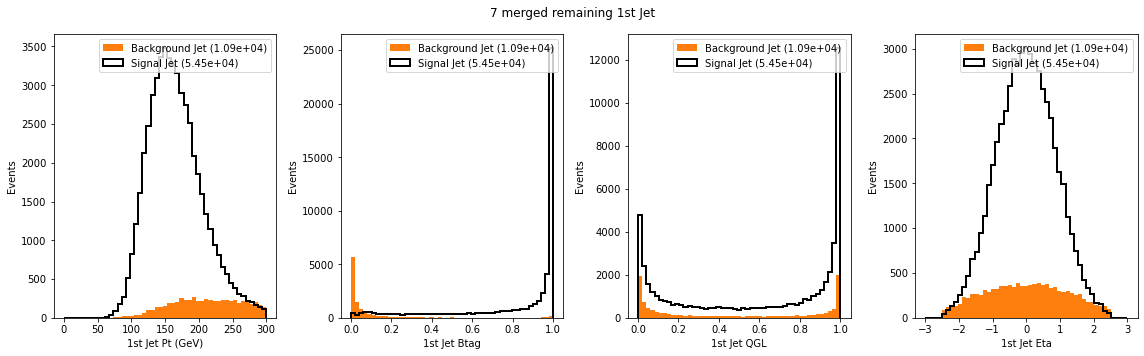

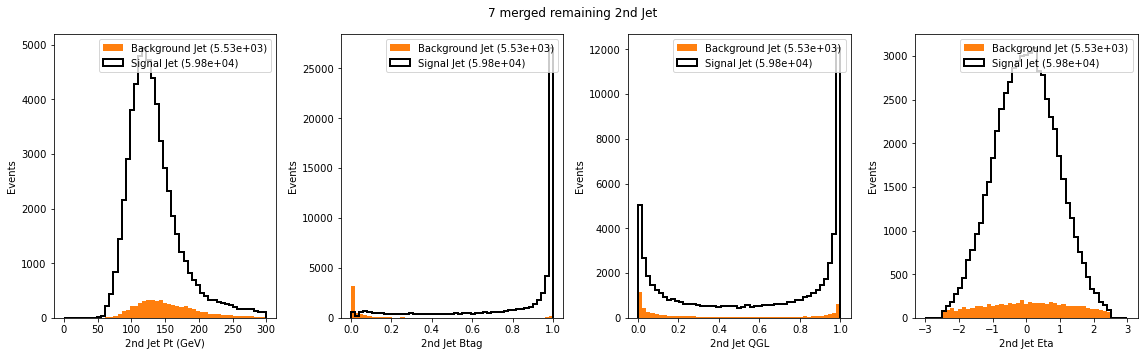

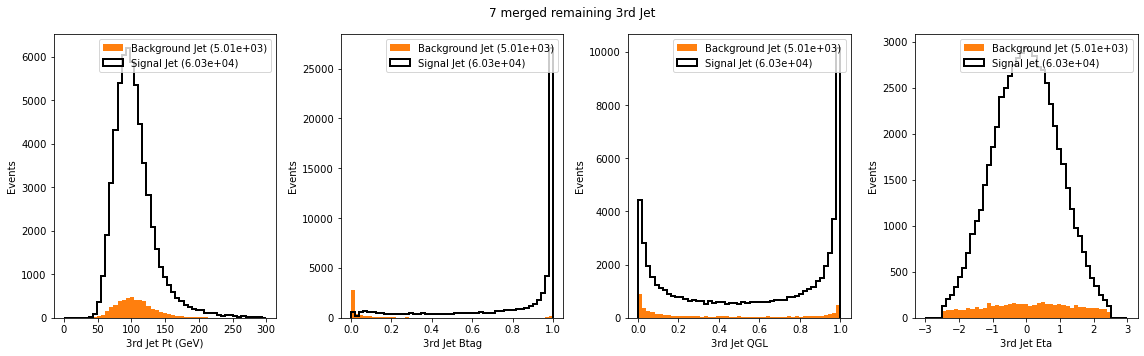

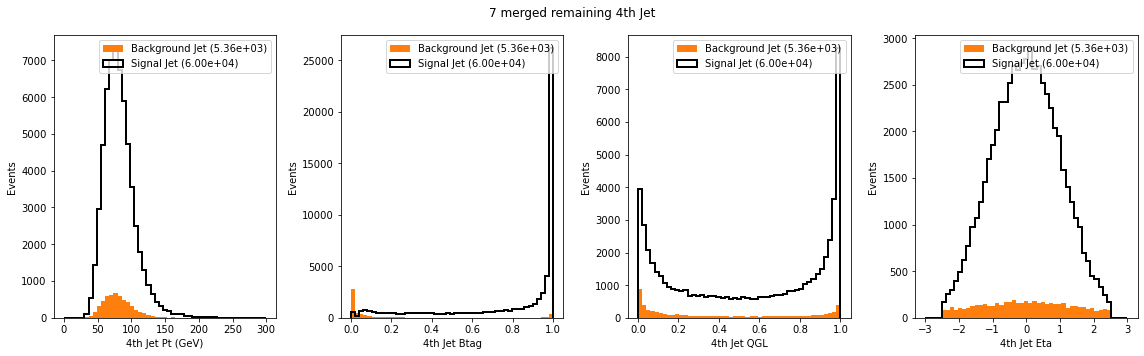

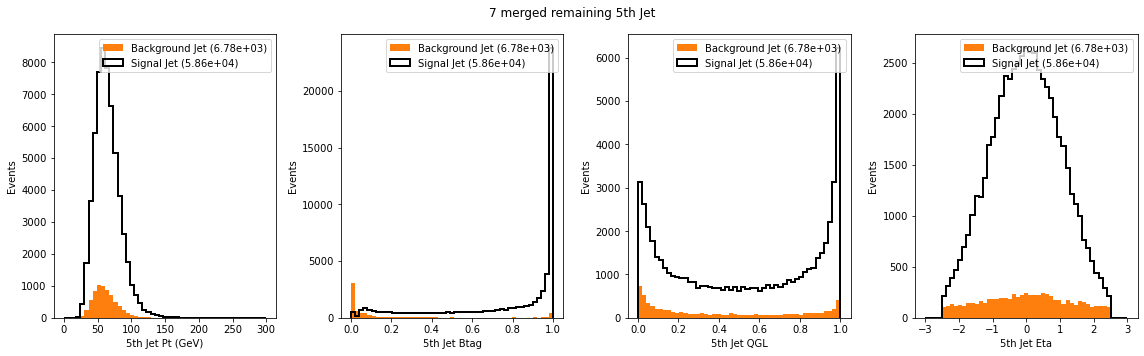

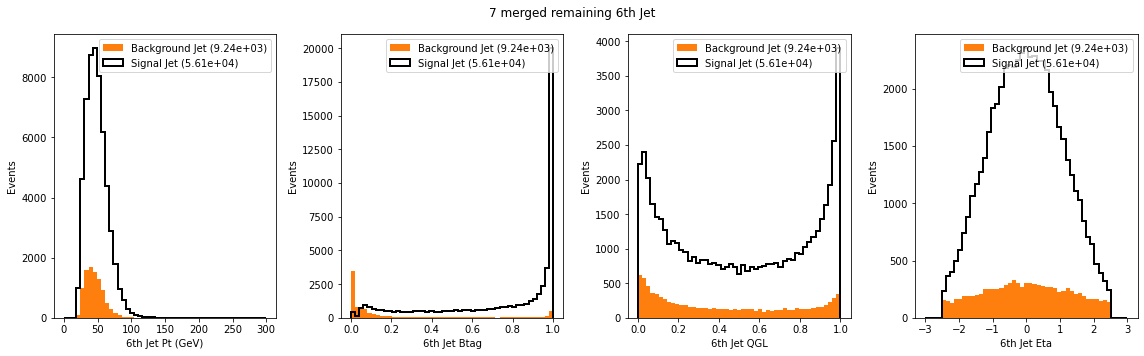

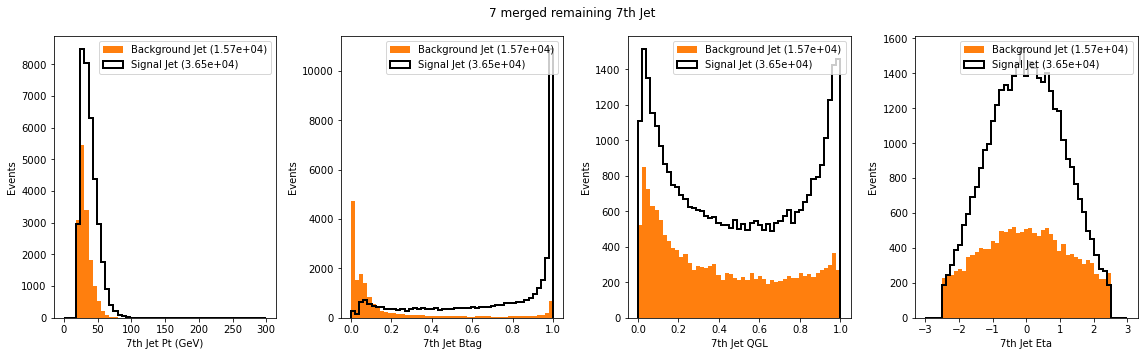

In [30]:
ijets_study(merged_remaining.selected_njets(7).sorted_selected_jets("jet_pt"),saveas="trial_ptordered")